In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import csv
from decimal import Decimal

In [80]:
# update_method_title = "FD6 Charge Update, FFT Wave Update, FFT Derivative"
# update_method_folder = "FD6_charge_FFT_wave_update_FFT_derivative"

# update_method_title = "FD6 Charge Update, FFT Derivative"
# update_method_folder = "FD6_charge_BDF_wave_update_FFT_derivative"

# update_method_title = "      FD6 Charge Update, FD6 Derivative"
# update_method_folder = "FD6_charge_BDF_wave_update_FD6_derivative"

# update_method_title = "FD6 Charge Update, FFT Derivative"
# update_method_folder = "FD6_charge_BDF_wave_update_FFT_derivative"

# update_method_title = "FFT Charge Update, FD6 Derivative"
# update_method_folder = "FFT_charge_BDF_wave_update_FD6_derivative"

# update_method_title = "      FFT Charge Update, BDF-1 Derivative"
# update_method_folder = "FFT_charge_BDF_wave_update_BDF_derivative"

# update_method_title = "      FFT Charge Update, FFT Derivative"
# update_method_folder = "FFT_charge_BDF_wave_update_FFT_derivative"

update_method_title = "      Naive Charge Map, BDF-1 Derivative"
update_method_folder = "vanilla"

# update_method_title = "Non-Iterative FFT";
# update_method_folder = "non_iterative_fft";

# update_method_title = "Vanilla"
# update_method_folder = "vanilla"

# filePath = matlab.desktop.editor.getActiveFilename;
# projectRoot = fileparts(filePath);
projectRoot = pathlib.Path().resolve()

labels = []

# grid_refinement = [16,32,64]
CFLs = [1]
particle_count_multipliers = [10]

titleFontSize = 32
tickFontSize = 28
subTickFontSize = 16
legendFontSize = 20
lineWidth = 1

for particle_count_multiplier in particle_count_multipliers:
    for CFL in CFLs:
        g16 = str(16)
        g32 = str(32)
        g64 = str(64)

        tag16 = g16 + "x" + g16

        ts_16 = []
        l2_err_16 = []

        ts_32 = []
        l2_err_32 = []

        ts_64 = []
        l2_err_64 = []

        tag_16 = str(g16) + "x" + str(g16)
        path_16 = str(projectRoot) + "\\conserving\\p_mult_" + str(particle_count_multiplier) + \
                "\\CFL_" + str(CFL) + "\\" + "no_mod" + "\\" + update_method_folder + "\\" + tag16 + "\\"
        csvPath_16 = path_16 + "csv_files\\" + "gauge_error.csv"

        tag_32 = str(g32) + "x" + str(g32)
        path_32 = str(projectRoot) + "\\conserving\\p_mult_" + str(particle_count_multiplier) + \
                "\\CFL_" + str(CFL) + "\\" + "no_mod" + "\\" + update_method_folder + "\\" + tag_32 + "\\"
        csvPath_32 = path_32 + "csv_files\\" + "gauge_error.csv"

        tag_64 = str(g64) + "x" + str(g64)
        path_64 = str(projectRoot) + "\\conserving\\p_mult_" + str(particle_count_multiplier) + \
                "\\CFL_" + str(CFL) + "\\" + "no_mod" + "\\" + update_method_folder + "\\" + tag_64 + "\\"
        csvPath_64 = path_64 + "csv_files\\" + "gauge_error.csv"

        # Open the CSV file
        with open(csvPath_16, 'r') as file:
            # Create a CSV reader
            csv_reader = csv.reader(file)

            # N = sum(1 for row in csv_reader)

            i = 0

            # Iterate over each row in the CSV file
            for row in csv_reader:
                # Each 'row' is a list representing a row in the CSV file
                ts_16.append(Decimal(row[0]))
                l2_err_16.append(Decimal(row[1]))
            
        # Open the CSV file
        with open(csvPath_32, 'r') as file:
            # Create a CSV reader
            csv_reader = csv.reader(file)

            # N = sum(1 for row in csv_reader)

            i = 0

            # Iterate over each row in the CSV file
            for row in csv_reader:
                # Each 'row' is a list representing a row in the CSV file
                ts_32.append(Decimal(row[0]))
                l2_err_32.append(Decimal(row[1]))

        # Open the CSV file
        with open(csvPath_64, 'r') as file:
            # Create a CSV reader
            csv_reader = csv.reader(file)

            # N = sum(1 for row in csv_reader)

            i = 0

            # Iterate over each row in the CSV file
            for row in csv_reader:
                # Each 'row' is a list representing a row in the CSV file
                ts_64.append(Decimal(row[0]))
                l2_err_64.append(Decimal(row[1]))

            # plt.plot(ts_16,l2_err_16)
            # plt.ylim([1.365065e-13,1.365075e-13])


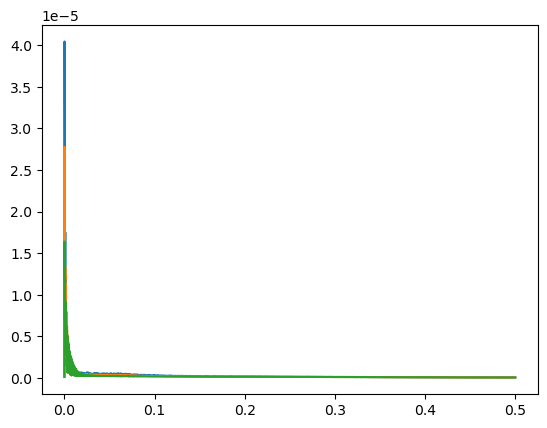

In [81]:
plt.plot(ts_16,l2_err_16)
plt.plot(ts_32,l2_err_32)
plt.plot(ts_64,l2_err_64)

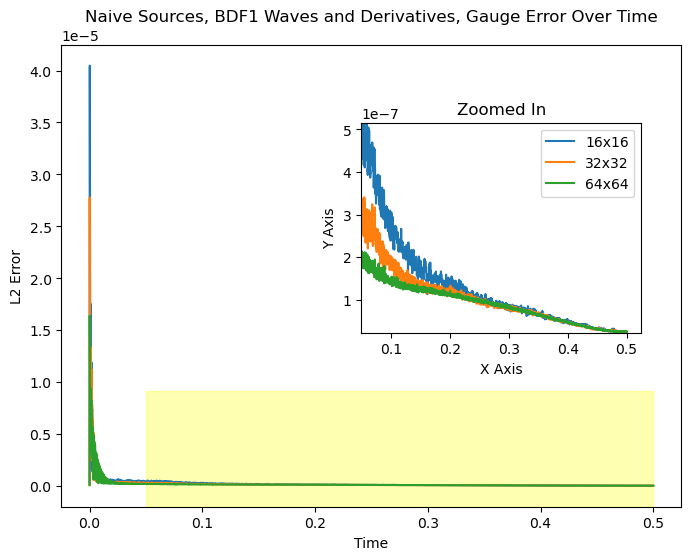

In [165]:
# Define the region to zoom in
zoom_start, zoom_end = np.searchsorted(ts_16,.05), len(ts_16)

# Create the main plot
plt.figure(figsize=(8, 6))
# plt.plot(x, y, label='Main Plot')
plt.plot(ts_16,l2_err_16)
plt.plot(ts_32,l2_err_32)
plt.plot(ts_64,l2_err_64)
plt.title('Naive Sources, BDF1 Waves and Derivatives, Gauge Error Over Time')
plt.xlabel('Time')
plt.ylabel('L2 Error')



# plt.axhspan(0, 1e-5, xmin=float(ts_16[zoom_start]), xmax=float(ts_16[zoom_end-1]), color='yellow', alpha=0.3)
# plt.axhspan(-1e-5, 1e-5, xmin=.05, xmax=.5, color='yellow', alpha=0.3)
plt.axvspan(ts_16[zoom_start], ts_16[zoom_end-1], ymin=0, ymax=.25, color='yellow', alpha=0.3)
# plt.axvspan(x[zoom_start], x[zoom_end], color='yellow', alpha=0.3, label='Zoomed In Area')

# Create a subplot (inset) within the main plot
axins = plt.axes([0.5, 0.4, 0.35, 0.35])  # [left, bottom, width, height]

# Plot the zoomed-in region
axins.plot(ts_16, l2_err_16, label='16x16')
axins.plot(ts_32, l2_err_32, label='32x32')
axins.plot(ts_64, l2_err_64, label='64x64')
axins.set_xlim(ts_16[zoom_start])
axins.set_ylim(min(l2_err_16[zoom_start:zoom_end]), max(l2_err_16[zoom_start:zoom_end]))

# Add a rectangle indicating the zoomed-in region
rect = plt.Rectangle((zoom_start, min(l2_err_16[zoom_start:zoom_end])), zoom_end - zoom_start, max(l2_err_16[zoom_start:zoom_end]) - min(l2_err_16[zoom_start:zoom_end]), edgecolor='r', facecolor='none')
axins.add_patch(rect)

# Set labels for the zoomed-in subplot
axins.set_title('Zoomed In')
axins.set_xlabel('Time')
axins.set_ylabel('L2 Error')

# Add a legend to the main plot
plt.legend()

# Show the plot
plt.show()


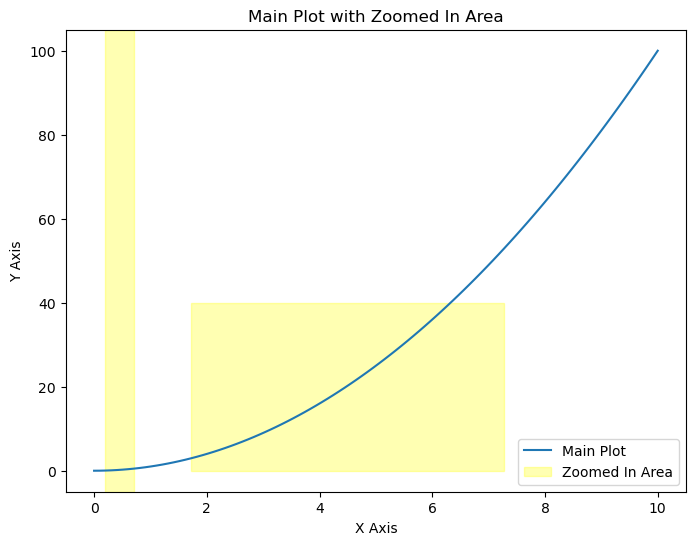

In [152]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some example data
x = np.linspace(0, 10, 100)
y = x**2

# Define the region to zoom in
zoom_start, zoom_end = 2, 7

# Create the main plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Main Plot')

# Highlight the zoomed-in region on the main plot (x-axis)
plt.axvspan(x[zoom_start], x[zoom_end], color='yellow', alpha=0.3, label='Zoomed In Area')

# Highlight the zoomed-in region on the main plot (y-axis)
plt.axhspan(0, 40, xmin=x[zoom_start], xmax=x[zoom_end], color='yellow', alpha=0.3)

# Set labels for the main plot
plt.title('Main Plot with Zoomed In Area')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

# Add a legend to the main plot
plt.legend()

# Show the plot
plt.show()


In [147]:
ts_16[zoom_end-1]

Decimal('0.499957800633165')